<a href="https://colab.research.google.com/github/pedramaghazadeh/CSA-CNN/blob/main/UT_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required libraries

In [ ]:
import tensorflow as tf
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split


Checking directories

In [ ]:
path_train = "/content/drive/MyDrive/Fingers/train"
path_test = "/content/drive/MyDrive/Fingers/test"

dir_train = os.listdir(path_train)
dir_test = os.listdir(path_test)


In [ ]:
images = []
labels = []

for sub_path in dir_train:
  image_path = path_train + "/" + sub_path
  img = cv2.imread(image_path)
  tag = int(sub_path[-6])
  images.append(img)
  labels.append(tag)
  if(len(labels) % 1000 == 0):
    print("Number of images loaded is : ", len(labels))

for sub_path in dir_test:
  image_path = path_test + "/" + sub_path
  img = cv2.imread(image_path)
  tag = int(sub_path[-6])
  images.append(img)
  labels.append(tag)
  if(len(labels) % 1000 == 0):
    print("Number of images loaded is : ", len(labels))

Number of images loaded is :  1000
Number of images loaded is :  2000
Number of images loaded is :  3000
Number of images loaded is :  4000
Number of images loaded is :  5000
Number of images loaded is :  6000
Number of images loaded is :  7000
Number of images loaded is :  8000
Number of images loaded is :  9000
Number of images loaded is :  10000
Number of images loaded is :  11000
Number of images loaded is :  12000
Number of images loaded is :  13000
Number of images loaded is :  14000
Number of images loaded is :  15000
Number of images loaded is :  16000
Number of images loaded is :  17000
Number of images loaded is :  18000
Number of images loaded is :  19000
Number of images loaded is :  20000
Number of images loaded is :  21000


Below code is for previous methods used for hand detection

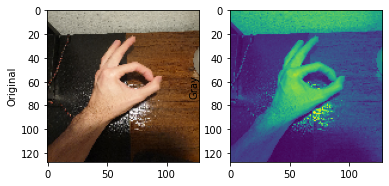

In [ ]:
path = "/content/drive/MyDrive/test3.jpg"
img = cv2.imread(path)
img = cv2.resize(img, (128, 128))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.ylabel("Original")

img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(1, 2, 2)
plt.imshow(img)
plt.ylabel("Gray")
plt.show()

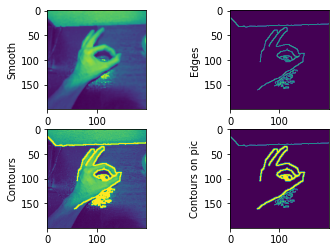

In [ ]:
smooth = cv2.bilateralFilter(img, 5, 80, 80)
plt.subplot(2, 2, 1)
plt.imshow(smooth)
plt.ylabel("Smooth")

edge = cv2.Canny(smooth, 70, 400)
plt.subplot(2, 2, 2)
plt.imshow(edge)
plt.ylabel("Edges")

contours, new = cv2.findContours(edge.copy(), cv2.RETR_LIST
                                 , cv2.CHAIN_APPROX_SIMPLE)
image_copy = img.copy()
contoured = cv2.drawContours(image_copy, contours, -1, (255, 0, 0), 2)

plt.subplot(2, 2, 3)
plt.imshow(contoured)
plt.ylabel("Contours")

contours = sorted(contours, key = cv2.contourArea, reverse = True)[:3]
image_reduced = edge.copy()
countor_pics = cv2.drawContours(image_reduced, contours, -1, (255, 0, 0), 2)

plt.subplot(2, 2, 4)
plt.imshow(countor_pics)
plt.ylabel("Contours on pic")
plt.show()

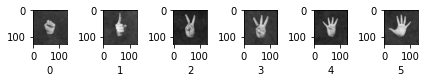

In [ ]:
tags = ["0", "1", "2", "3", "4", "5"]

for i in range(6):
  for j in range(len(labels)):
    if(labels[j] == i):
      plt.subplot(1, 6, i + 1)
      plt.xlabel(labels[j])
      plt.imshow(images[j])
      break

plt.tight_layout()
plt.show()

Data is correctly loaded

10 different classes can be seen in the figure above

Number of images: 21610
Number of labels: 21610


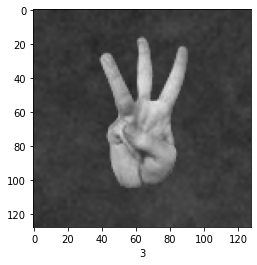

In [ ]:
print("Number of images:", len(images))
print("Number of labels:", len(labels))

img = images[500]
plt.imshow(img)
plt.xlabel(labels[500])
plt.show()

Converting all images to grayscale for better hand recognition

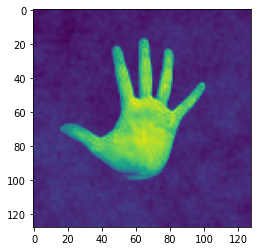

In [ ]:
for i in range(len(images)):
  img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
  images[i] = img
plt.imshow(images[1])

Applying 1 hot encoding to labels

 Checking the number of images in each class

In [ ]:
encoded_labels = tf.one_hot(labels, 6)
images = np.asarray(images)
pic_groups = [0] * 6
for x in labels:
  pic_groups[x] += 1
df = pd.DataFrame([pic_groups[0]], columns = [tags[0]])
for i in range(1, 6):
  df = pd.concat([df, pd.DataFrame([pic_groups[i]], columns = [tags[i]])]
                    , axis = 1)
df.index = ["Number of images"]
df

,0,1,2,3,4,5
Number of images,3600,3610,3600,3600,3600,3600


In [ ]:
encoded_labels = np.asarray(encoded_labels, dtype= "uint8")
print(encoded_labels.shape)
print(encoded_labels[120], labels[120])

(21610, 6)
[0 0 0 0 0 1] 5


We have 3600 instances of each of 10 classes

In [ ]:
threshold = 0.3
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels
                                                    , test_size = threshold
                                                    , random_state = 42)

In [ ]:
print(X_train.shape, y_train.shape)

(15127, 128, 128) (15127, 6)


In [ ]:
tf.keras.backend.clear_session()
model = Sequential()
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape = (128, 128, 1)))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(40, activation = "relu"))
model.add(Dense(6, activation = "softmax"))
model.compile(optimizer = "adam", loss = "categorical_crossentropy"
              , metrics = ["accuracy"])
model.summary()
trained_model = model.fit(X_train, y_train, epochs = 10, batch_size = 64
                          , verbose = 1, validation_data = (X_test, y_test))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 123008)            0         
                                                                 
 dropout (Dropout)           (None, 123008)            0         
                                                                 
 dense (Dense)               (None, 40)                4920360   
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                        

83% Accuracy !

Not bad, but how can we improve it significantly?

One way is to try different architectures for our model,

OR we can use a meta huristic algorithm such as CSA!

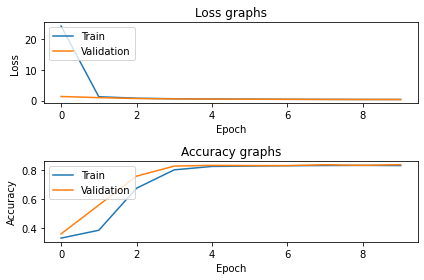

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(trained_model.history["loss"])
plt.plot(trained_model.history["val_loss"])
plt.title("Loss graphs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc = "upper left")

plt.subplot(2, 1, 2)
plt.plot(trained_model.history["accuracy"])
plt.plot(trained_model.history["val_accuracy"])
plt.title("Accuracy graphs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc = "upper left")
plt.tight_layout()
plt.show()

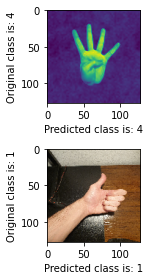

In [ ]:
ind = np.random.randint(20_000)
inputs = []
inputs.append(images[ind])
inputs = np.asarray(inputs)

ans = model.predict(inputs)

ans_ind = int(np.argmax(ans))
plt.subplot(2, 1, 1)
plt.imshow(images[ind])
plt.xlabel("Predicted class is: " + tags[ans_ind])
plt.ylabel("Original class is: " + tags[labels[ind]])

test_path = "/content/drive/MyDrive/test2.jpg"
img_rgb = cv2.imread(test_path)
img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
img_rgb = cv2.resize(img_rgb, (128, 128))
img = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
img = np.asarray(img)

inputs = []
inputs.append(img)
inputs = np.asarray(inputs)

ans = model.predict(inputs)
ans_ind = int(np.argmax(ans[0]))
plt.subplot(2, 1, 2)
plt.imshow(img_rgb)
plt.xlabel("Predicted class is: " + tags[ans_ind])
plt.ylabel("Original class is: 1")
plt.tight_layout()
plt.show()

Not bad with my own hand :D

In [ ]:
def normalize_crow(crow):
  crow = np.asarray(crow, dtype = "uint8")
  #1<=conv_layers<=5
  crow[0] = min(crow[0], 5)
  crow[0] = max(crow[0], 1)
  #1<=dense_layers<=5
  crow[1] = min(crow[1], 5)
  crow[1] = max(crow[1], 1)
  #activation_func is either relu(1), sigmoid(2), or softplus(3)
  crow[2] = min(crow[2], 3)
  crow[2] = max(crow[2], 1)
  #optimization_func is either adam(1), nadam(2), adagrad(3), or adadelta(4)
  crow[3] = min(crow[3], 4)
  crow[3] = max(crow[3], 1)
  #epochs range from 1 to 15
  crow[4] = min(crow[4], 15)
  crow[4] = max(crow[4], 1)
  #batch_size range from 1 to 200
  crow[5] = min(crow[5], 200)
  crow[5] = max(crow[5], 1)
  #maxpooling(1) or average pooling(2)
  crow[6] = min(crow[2], 2)
  crow[6] = max(crow[2], 1)
  return crow

In [ ]:
def fitness(crow):
  n_conv = int(crow[0])
  
  n_dense = int(crow[1])
  
  if(int(crow[2]) == 1):
    act_func = "relu"
  elif(int(crow[2]) == 2):
    act_func = "sigmoid"
  else:
    act_func = "softplus"
  
  if(int(crow[3]) == 1):
    opt_func = "adam"
  elif(int(crow[3]) == 2):
    opt_func = "nadam"
  elif(int(crow[3]) == 3):
    opt_func = "adagrad"
  else:
    opt_func = "adadelta"
  
  n_epochs = int(crow[4])
  n_batch = int(crow[5])
  pooling = int(crow[6])

  tf.keras.backend.clear_session()
  model = Sequential()

  model.add(Conv2D(32, (5,5), activation = act_func
                    , input_shape = (128, 128, 1)))
  if(pooling == 1):
    model.add(MaxPooling2D(2, 2))
  else:
    model.add(AveragePooling2D(2, 2))

  for _ in range(n_conv - 1):
    model.add(Conv2D(32, (5,5), activation = act_func))
    #Addin pooling layer according to crow
    if(pooling == 1):
      model.add(MaxPooling2D(2, 2))
    else:
      model.add(AveragePooling2D(2, 2))    

  model.add(Flatten())
  model.add(Dropout(0.2))

  #dense layers
  for _ in range(n_dense):
    model.add(Dense(100, activation = act_func))
  model.add(Dense(6, activation = "softmax"))

  model.compile(optimizer = opt_func, loss = "categorical_crossentropy"
               , metrics = ["accuracy"])
  
  model.summary()
  model.fit(X_train, y_train, epochs = n_epochs, batch_size = n_batch
            , verbose = 1, validation_data = (X_test, y_test))
  scores = model.evaluate(X_test, y_test, verbose = 0)
  
  return scores[1]


In [ ]:
n = 10
#arguments for csa are:
#conv_layers, dense_layers, activation_func, optimizatoin_func, epochs,
# batch_sizem, and pooling layers
crows = np.zeros((n, 7))
memories = np.zeros((n, 7))

crows[0] = np.asarray([2.5, 3.2, 5, 8.345, 14.3, 223, 6.2])
print(crows)
crows[1] = normalize_crow(crows[0])
print(crows)
crows[2] = np.asarray([2.5, 2.2, 2.2, 1.95, 5.5, 32.3, 4.2])
print(normalize_crow(crows[2]))
print(fitness(normalize_crow(crows[2])))

[[  2.5     3.2     5.      8.345  14.3   223.      6.2  ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]]
[[  2.5     3.2     5.      8.345  14.3   223.      6.2  ]
 [  2.      3.      3.      4.     14.    200.      3.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0.   ]
 [  0.      0.      0.      0.      0.      0.      0. 

In [ ]:
def crow_search(n, max_iter):
  crows = np.zeros((n, 7))
  new_crows = np.zeros((n, 7))
  memories = np.zeros((n, 7))
  memories_fitness = np.zeros(n)
  best_location = np.zeros((1, 7))
  best_location_fitness = 0
  #random initialize locations and best memories
  for i in range(n):
    crows[i] = np.asarray([np.random.randint(5),
                           np.random.randint(5),
                           np.random.randint(3),
                           np.random.randint(4),
                           np.random.randint(15),
                           np.random.randint(200),
                           np.random.randint(2)])
    print("Initializing crow ", i)
    crows[i] = normalize_crow(crows[i])
    memories[i] = crows[i]
    memories_fitness[i] = fitness(memories[i])
    if(memories_fitness[i] > best_location_fitness):
      best_location_fitness = memories_fitness[i]
      best_location = crows[i]
  #known probability 
  kp = 0.6
  flight_length = np.ones(n)
  for _ in range(max_iter):
    print("Iteration is : ", _)
    s = np.random.random(size = (n))
    kp /= 2
    for i in range(n):
      #choosing another crow randomly
      j = np.random.randint(n)
      while(j == i):
        j = np.random.randint(n)
      if(s[j] < kp):
        #crow j finds out that he/she is being followed
        #crow i will move to a random location
        new_crows[i] = np.asarray([np.random.randint(5),
                           np.random.randint(5),
                           np.random.randint(3),
                           np.random.randint(4),
                           np.random.randint(15),
                           np.random.randint(200),
                           np.random.randint(2)])
      else:
        #crow i follows crow j for a short period of time
        new_crows[i] = crows[i] + s[i] * flight_length[i] * (memories[j] - crows[i])
      new_crows[i] = normalize_crow(crows[i])
    #updating new locations and memories
    for i in range(n):
      crows[i] = new_crows[i]
      print("Crow number is : ", i)
      new_location_fitness = fitness(crows[i])
      print("Accuracy", new_location_fitness)
      if(new_location_fitness > memories_fitness[i]):
        memories_fitness[i] = new_location_fitness
        memories[i] = crows[i]
      #finding best answer in all iterations and crows
      if(memories_fitness[i] > best_location_fitness):
        best_location_fitness = memories_fitness[i]
        best_location = crows[i]
  print(best_location_fitness)
  return best_location

In [ ]:
print(crow_search(3, 5))

Initializing crow  0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 58, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPooling  (None

**Accuracy 1.0**

train accuracy 0.9989202618598938

test accuracy 0.9993829727172852

[  4.   3.   1.   1.  14. 135.   1.]

We reached near 100% Accuracy !

The model reached this result has:
4 layers of convolution 32, (5,5) with maxpooling2D(2,2) and relu activation 

flatten layer

4 dense layers Dense(10, relu)

1 output layer (6, softmax)

optimizer is adam, batch size is 135 and 14 epochs were used.